In [238]:
# In this kernel, I am setting up my notebook so that I may run all my functions and add ons appropriately
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from acquire import get_telco_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import prepare

<h1><h1 style="color:lightcoral"> Data Acquisition </h2>

In [197]:
# I am loading my acquired data into a data frame called acquired. This is my raw data before I prepared it.
acquired= get_telco_data()

<h3> <h3 style= "color: salmon"> Summarizing the data </h3>

In [198]:
# Getting a concise summary of the dataframe.
acquired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  7043 non-null   int64  
 1   customer_id                 7043 non-null   object 
 2   gender                      7043 non-null   object 
 3   senior_citizen              7043 non-null   int64  
 4   partner                     7043 non-null   object 
 5   dependents                  7043 non-null   object 
 6   tenure                      7043 non-null   int64  
 7   phone_service               7043 non-null   object 
 8   multiple_lines              7043 non-null   object 
 9   internet_service_type_id    7043 non-null   int64  
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

In [199]:
# Viewing some basic statistical details such as percentile, mean, std etc. of the numerical values in a data frame
acquired.describe()

,Unnamed: 0,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id.1,internet_service_type_id.1,payment_type_id.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,2033.283305,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,1760.500000,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,3521.000000,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,5281.500000,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,7042.000000,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


<h3> <h3 style= "color: salmon"> Plotting distributions of the variables. </h3>

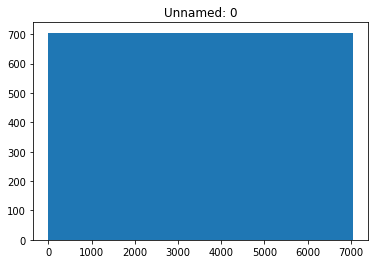

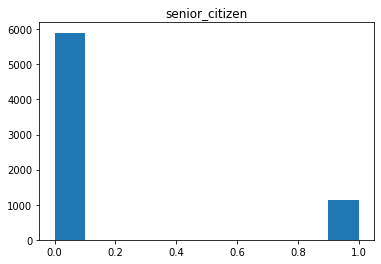

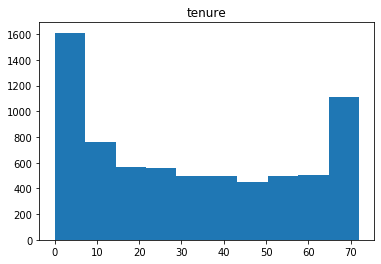

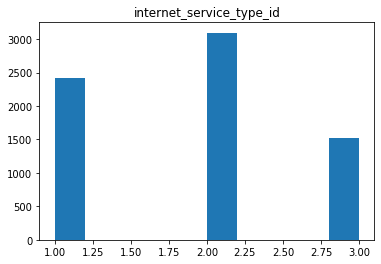

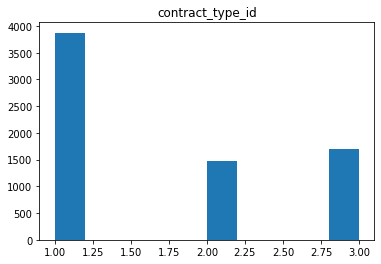

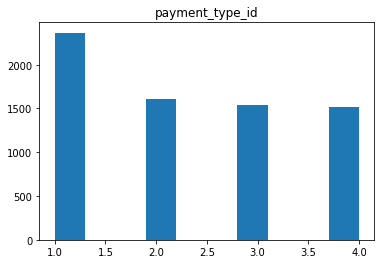

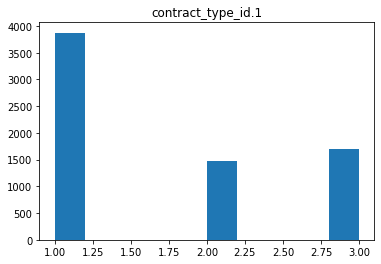

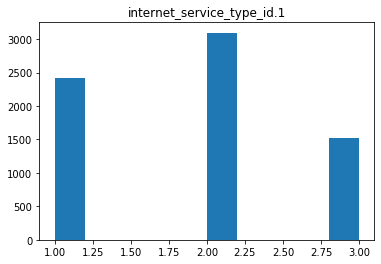

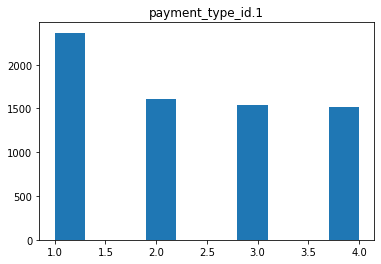

In [200]:
# Distribution of my numerical columns
num_cols = acquired.columns[[acquired[col].dtype == 'int64' for col in acquired.columns]]
for col in num_cols:
    plt.hist(acquired[col])
    plt.title(col)
    plt.show()

<h1> <h1 style="color:lightcoral">Data Prep</h1>

In [201]:
# importing my cleaned data
df= prepare.clean_telco()

In [202]:
# showing my clean data information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [203]:
#Describing my object columns
# describe object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))

5301-GAUUY    1
7233-IOQNP    1
6712-OAWRH    1
3831-YCPUO    1
5199-FPUSP    1
             ..
2372-HWUHI    1
2061-VVFST    1
4472-LVYGI    1
9388-ZEYVT    1
8614-VGMMV    1
Name: customer_id, Length: 7043, dtype: int64
5301-GAUUY    0.000142
7233-IOQNP    0.000142
6712-OAWRH    0.000142
3831-YCPUO    0.000142
5199-FPUSP    0.000142
                ...   
2372-HWUHI    0.000142
2061-VVFST    0.000142
4472-LVYGI    0.000142
9388-ZEYVT    0.000142
8614-VGMMV    0.000142
Name: customer_id, Length: 7043, dtype: float64
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: f

In [204]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of monthly_charges by binning
df.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.35]    1797
(38.35, 58.45]                 1005
(58.45, 78.55]                 1367
(78.55, 98.65]                 1826
(98.65, 118.75]                1048
Name: monthly_charges, dtype: int64

In [205]:
# Checking for null values
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

<h4 style= "color: lightsalmon"> 
<li>I cleaned up the data by getting rid of the following columns:  Unnamed: 0, internet_service_type_id, tenure,contract_type_id, contract_type_id.1, internet_service_type_id.1, payment_type_id.1, and payment_type_id.</li> <br><br>
<li>I made new columns containing the following: tenure to years_tenure, partner and dependents to is_family, phone_service and multiple_lines to has_phones, online_backup and online_security to has_security_features, and finally I made a dummy variable for churn called is_churn and concatenated it to my dataframe.</li><br><br>
<li> By looking at my data, I didn't have any nulls. I also found that 4,241/7,043 of customers pay over $58.45    </h3>

<h1> <h1 style="color:lightcoral">Hypothesis Testing </h1>

<h3> <h3 style= "color: salmon"> 
First Hypothesis<br>
$H_0$: Tenure has no effect on churn rate. <br>
$H_a$: Tenure effects the churn rate. <br>
alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)
<br><br>

In [206]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [207]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.tenure, df.is_churn)
r, p

(-0.3522286701130779, 7.999057960599509e-205)

In [208]:
#Comparing my p value against my α
p < α

True

In [209]:
print("Since p is less than α, we reject our null hypothesis that Tenure has no effect on churn rate.")

Since p is less than α, we reject our null hypothesis that Tenure has no effect on churn rate.


<h3> <h3 style= "color: salmon"> Second Hypothesis<br>
$H_0$: People who churn are paying more per month than those who arent. <br>
$H_a$: People who churn are paying the equal to or less than those who dont churn. <br>
 <br> </h3>

In [210]:
t, p = stats.ttest_1samp(df.monthly_charges, df.is_churn.median())
t, p

(180.6234638735829, 0.0)

A t value of 180.623 and p-value of 0.0 indicates the likelyhood of customers deciding to churn due to paying more per month is extremely high.

<h1> <h1 style="color:lightcoral">Data Exploration </h1>


In [211]:
np.random.seed(123)

In [213]:
train, validate, test = prepare.prep_telco_data()

In [315]:
train.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,internet_service_type,payment_type,years_tenure,has_streaming,is_family,has_phones,has_security_features,is_churn
5670,2739-CCZMB,Male,0,No,Yes,5,Yes,No,No internet service,No internet service,...,No,Month-to-month,None,Credit card (automatic),0.416667,False,False,True,False,0
4152,8035-PWSEV,Female,0,No,No,6,Yes,No,No,No,...,No,Month-to-month,Fiber optic,Electronic check,0.500000,False,False,True,False,0
4890,6250-CGGUN,Male,0,No,No,54,Yes,No,Yes,No,...,No,One year,Fiber optic,Electronic check,4.500000,False,False,True,True,0


In [215]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churned')

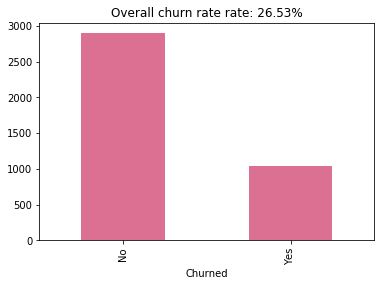

In [216]:
# Calculating and showing the overall churn rate
train.churn.value_counts().sort_index().plot.bar(color='palevioletred')
survival_rate = train.is_churn.mean()
plt.title(f"Overall churn rate rate: {survival_rate:.2%}")
plt.xlabel('Churned')


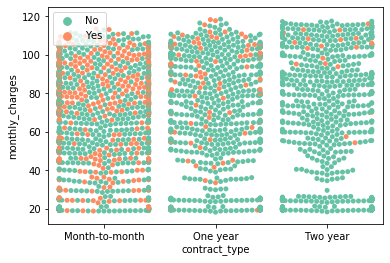

In [217]:
sns.swarmplot(x="contract_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

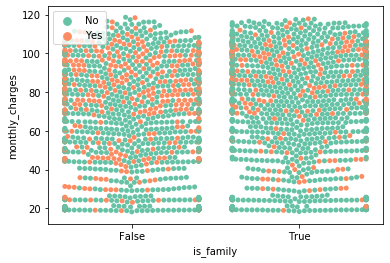

In [259]:
sns.swarmplot(x="is_family", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

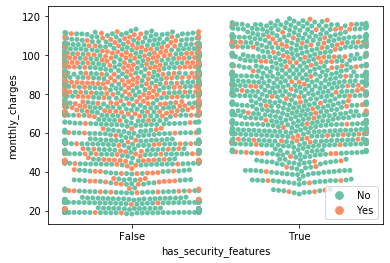

In [261]:
sns.swarmplot(x="has_security_features", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

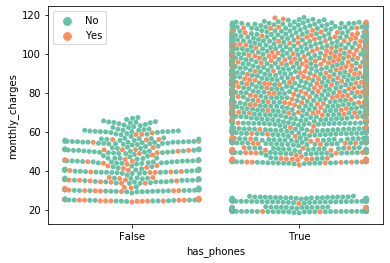

In [262]:
sns.swarmplot(x="has_phones", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

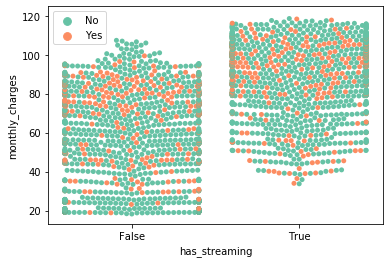

In [263]:
sns.swarmplot(x="has_streaming", y="monthly_charges", data=train, hue="churn", palette="Set2")
plt.legend()

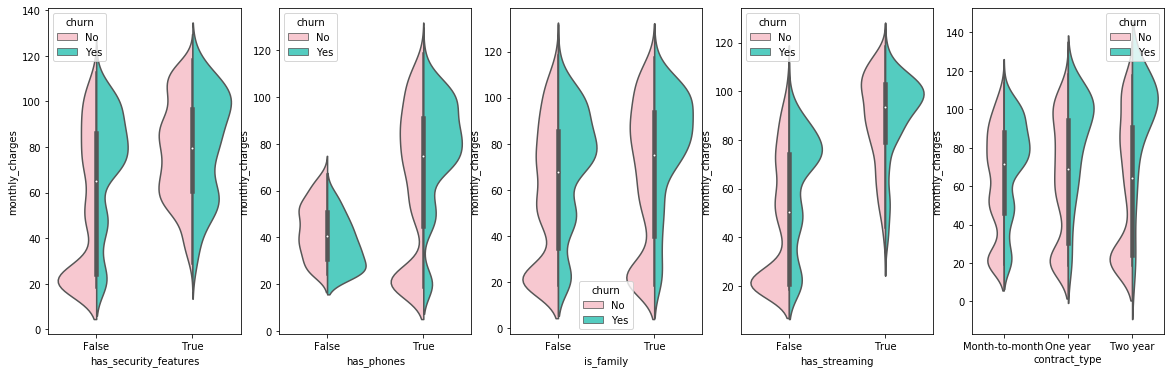

In [266]:
features = ["has_security_features", "has_phones", "is_family", "has_streaming", "contract_type"]
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn",
        data=train,
        split=True,
        ax=ax[i],
        palette=["pink", "turquoise"],
    )

#Based off the data, people on month-to-month contracts, with no family members, with a phone and security features churn more than those who don't fit that criteria. Streaming doesn't seem to have a relationship with churn.

In [219]:
#Making a baseline prediction
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [220]:
#concatenating the baseline prediction to the df
df['baseline_prediction'] = 'not_churn'

<h1 style="color:lightcoral">Modeling </h1>

In [314]:
#Making Train Validate Test and Split
X = df[["has_security_features", "has_phones", "is_family"]]
y = df[['is_churn']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (3943, 3) , validate:  (1691, 3) , test:  (1409, 3)
train:  (3943, 1) , validate:  (1691, 1) , test:  (1409, 1)


<h3> <h3 style= "color: salmon"> Logistic Regression </h3>

<h4 style= "color: lightsalmon">Computing the Logistic Regression Model #1 </h4>

In [270]:
# setting up my linear regression object
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [271]:
# fitting the logit to my x and y trains
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
#Print the coefficients and intercept of the model
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.84716628  0.13548724 -0.6142418 ]]
Intercept: 
 [3.92303906]


In [273]:
#Estimate whether or not a customer would churn, using the training data
y_pred = logit.predict(X_train)
#Estimate the probability of a customer churning, using the training data
y_pred_proba = logit.predict_proba(X_train)

<h4 style= "color: lightsalmon">Evaluating the Logistic Regression Model #1 </h4>

In [274]:
print('The accuracy of the Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train, y_train)))

The accuracy of the Logistic Regression classifier on training set: 0.27


In [275]:
#Making a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[   0 2896]
 [   0 1047]]


In [276]:
# Compute Precision, Recall, F1-score, and Support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2896
           1       0.27      1.00      0.42      1047

    accuracy                           0.27      3943
   macro avg       0.13      0.50      0.21      3943
weighted avg       0.07      0.27      0.11      3943



<h4> <h4 style= "color: lightsalmon">
Precision: My churn was identified 27% of the  the time.
<br>
Recall: My recall score is high which means I didn't miss alot of churn, however as a result I had a low precision rate.
<br>
f1-score: My f1 score is 42%. This means that my recall and precision don't have equal weight. This is evident by my low precision and high recall. 
<br>
Support: There are 1047 instances of the y being true. </h4>

<h4 style= "color: lightsalmon">Computing the Logistic Regression Model #2 </h4>

In [277]:
# Model #2 object where C is equal to 0.5
logit2 = LogisticRegression(C=.5, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [278]:
logit2.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [279]:
# Printing coeffiecients and intercept of the model
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.84586625  0.13496864 -0.61350799]]
Intercept: 
 [3.92271355]


In [280]:
#Estimate whether or not a customer would churn, using the training data
y_pred2 = logit2.predict(X_train)
#Estimate the probability of a customer churning, using the training data
y_pred_proba = logit2.predict_proba(X_train)

<h4 style= "color: lightsalmon">Evaluating the Logistic Regression Model #2 </h4>

In [281]:
#Computing the accuracy on model # 2
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.27


In [282]:
# Computing the confusion matrix of model # 2
print(confusion_matrix(y_train, y_pred2))

[[   0 2896]
 [   0 1047]]


In [283]:
# # Compute Precision, Recall, F1-score, and Support
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2896
           1       0.27      1.00      0.42      1047

    accuracy                           0.27      3943
   macro avg       0.13      0.50      0.21      3943
weighted avg       0.07      0.27      0.11      3943



<h4> <h4 style= "color: lightsalmon">
Precision: My churn was identified 27% of the  the time.
<br>
Recall: My recall score is high which means I didn't miss alot of churn, however as a result I had a low precision rate.
<br>
f1-score: My f1 score is 42%. This means that my recall and precision don't have equal weight. This is evident by my low precision and high recall. 
<br>
Support: There are 1047 instances of the y being true. </h4>

<h4 style= "color: lightsalmon">Evaluating the Logistic Regression Models against my Validate (unseen) data </h4>

In [284]:
y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred1))

print(classification_report(y_validate, y_pred1))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.26
[[   0 1253]
 [   0  438]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1253
           1       0.26      1.00      0.41       438

    accuracy                           0.26      1691
   macro avg       0.13      0.50      0.21      1691
weighted avg       0.07      0.26      0.11      1691



<h4> <h4 style= "color: lightsalmon">
Precision: My churn was identified 26% of the  the time.
<br>
Recall: My recall score is high which means I didn't miss alot of churn, however as a result I had a low precision rate.
<br>
f1-score: My f1 score is 41%. This means that my recall and precision don't have equal weight. This is evident by my low precision and high recall. 
<br>
Support: There are 438 instances of the y being true. </h4>

<h3> <h3 style= "color: salmon"> Decision Tree </h3>

In [285]:
# Create the Decision Tree Object
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [286]:
# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [287]:
#estimate churn
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [288]:
# estimate the probability of a customer churning
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.78426396, 0.21573604],
       [0.63555251, 0.36444749],
       [0.76567944, 0.23432056],
       [0.63555251, 0.36444749],
       [0.63555251, 0.36444749]])

<h4 style= "color: lightsalmon">Evaluating the Decision Tree Model </h4>

In [289]:
print('The accuracy of the Decision Tree classifier on the training set: {:.2f}'.format(clf.score(X_train, y_train)))

The accuracy of the Decision Tree classifier on the training set: 0.73


In [290]:
## Creating a confusion matrix
confusion_matrix(y_train, y_pred)

array([[2896,    0],
       [1047,    0]])

In [291]:
sorted(y_train.is_churn.unique())

[0, 1]

In [292]:
y_train.is_churn.value_counts()

0    2896
1    1047
Name: is_churn, dtype: int64

In [293]:
## Printing a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2896
           1       0.00      0.00      0.00      1047

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



<h4> <h4 style= "color: lightsalmon">
Precision: My not churn was identified 73% of the  the time.
<br>
Recall: My recall score is high at 1.0.
<br>
f1-score: My f1 score is 85%. This means that my recall and precision have close to equal weights. This is evident by my high precision and high recall. 
<br>
Support: There are 2896 instances of the y being false. </h4>

<h4 style= "color: lightsalmon">Evaluating the Decision Tree Model against my Validate (unseen) data </h4>

In [294]:
# Evaluate the Model with the validate dataset
print('The accuracy of the Decision Tree classifier on the validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

The accuracy of the Decision Tree classifier on the validate set: 0.74


<h3> <h3 style= "color: salmon"> Random Forest Model</h3>

In [297]:
# setting up my random forest object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [298]:
# fitting my train data to my rf
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [299]:
#print feature importances
print(rf.feature_importances_)

[0.5346624  0.03694492 0.42839268]


In [300]:
# Estimate whether or not a customer would churn, using the training data
y_pred = rf.predict(X_train)

In [301]:
# Estimate the probability of a customer churning, using the training data
y_pred_proba = rf.predict_proba(X_train)

<h4 style= "color: lightsalmon">Evaluating the Random Forest Model </h4>

In [302]:
#computing the accuracy of the random forest classifier on the training set
print('The accuracy of the random forest classifier on the training set: {:.2f}'.format(rf.score(X_train, y_train)))

The accuracy of the random forest classifier on the training set: 0.73


In [303]:
# A confusion matrix of my random forest data
print(confusion_matrix(y_train, y_pred))

[[2896    0]
 [1047    0]]


In [304]:
# A classification report of my random forest data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2896
           1       0.00      0.00      0.00      1047

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



<h4> <h4 style= "color: lightsalmon">
Precision: My not churn was identified 73% of the  the time.
<br>
Recall: My recall score is high at 1.0.
<br>
f1-score: My f1 score is 85%. This means that my recall and precision have close to equal weights. This is evident by my high precision and high recall. 
<br>
Support: There are 2896 instances of the y being false. </h4>

<h4 style= "color: lightsalmon">Evaluating the Random Forest Model against my Validate (unseen) data </h4>

In [305]:
print('The accuracy of the random forest classifier on validate set: {:.2f}'.format(rf.score(X_validate, y_validate)))

The accuracy of the random forest classifier on validate set: 0.74


<h3> <h3 style= "color: salmon"> K Nearest Neighbor (KNN)</h3>

In [306]:
#Creating the KNN Object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [307]:
#Fit the KNN model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [308]:
#Estimate whether or not a customer would churn, using the training data
y_pred = knn.predict(X_train)
#Estimate the probability of a customer churning, using the training data
y_pred_proba = knn.predict_proba(X_train)

<h4 style= "color: lightsalmon">Evaluating the KNN Model </h4>

In [309]:
# computing the accuracy of the KNN classifier
print('The accuracy of the KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

The accuracy of the KNN classifier on training set: 0.63


In [310]:
#Computing a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[1970  926]
 [ 516  531]]


In [311]:
#Computing Precision, Recall, F1-score, and Support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2896
           1       0.36      0.51      0.42      1047

    accuracy                           0.63      3943
   macro avg       0.58      0.59      0.58      3943
weighted avg       0.68      0.63      0.65      3943



<h4> <h4 style= "color: lightsalmon">
Precision: My not churn was identified 79% of the  the time and my churn was identified 36% of the time,.
<br>
Recall: My recall score for not churn is 0.73. My recall score for churned is 0.51.
<br>
f1-score: My f1 score is 73% for churned. This means that my recall and precision have close to equal weights. My f1 score for churned is 42%  which means that my recall has a higher metric weight than precision.
<br>
Support: There are 2896 instances of churn and 1047 instances of not churned. </h4>

<h4 style= "color: lightsalmon">Evaluating the KNN against my Validate (unseen) data </h4>

In [313]:
print('The accuracy of KNN classifier on the validate set: {:.2f}'.format(knn.score(X_validate, y_validate)))

The accuracy of KNN classifier on the validate set: 0.65


<h3> <h3 style= "color: salmon"> Modeling Summary </h3>

<h4> <h4 style= "color: lightsalmon">The baseline model was created by predicting the no churn every time.
<br>
Each model has been evaluated based on accuracy, precision and recall. <br>
The model that is the best fit has the highest accuracy as it will correctly predict who is churning and who is not churning.<br>
The best fitting models for the data are the decision tree and random forest. Both have an accuracy of predicting who is churning 74% of the time.</h4>

In [318]:
print('The accuracy of the Random Forest classifier on the test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('The accuracy of the Decision Tree classifier on the test set: {:.2f}'.format(clf.score(X_test, y_test)))

The accuracy of the Random Forest classifier on the test set: 0.73
The accuracy of the Decision Tree classifier on the test set: 0.73


In [ ]:
<h1 style="color:lightcoral">Conclusion</h1>